In [1]:
#Library Imports
import numpy as np
import pandas as pd
import math
import os
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error



In [2]:
train=pd.read_csv('Train_for_model.csv')
test=pd.read_csv('Test_for_model.csv')
# submission=pd.read_csv('sample_submission.csv')

<function matplotlib.pyplot.show(close=None, block=None)>

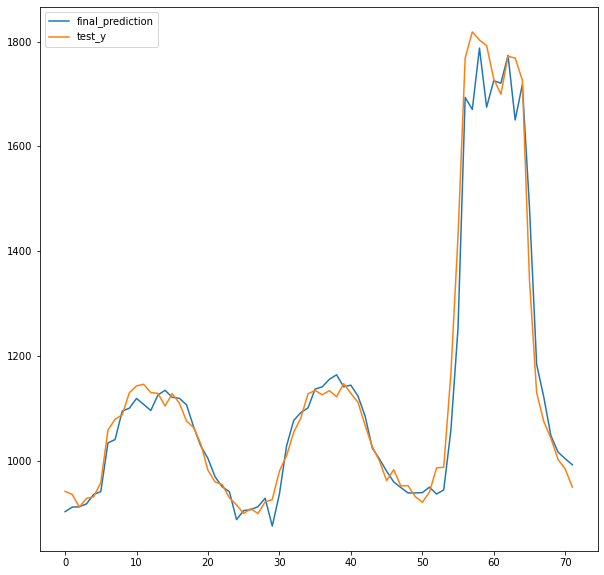

In [42]:
plt.figure(figsize=(10,10))
plt.plot(day, final_prediction)
plt.plot(day, test_y)
plt.legend(['final_prediction', 'test_y'])
plt.show

# **데이터 전처리**

In [3]:
test_13 = test['num'] == 13
test = test[test_13]

train_13 = train['num'] == 13
train = train[train_13]

In [4]:
train['date_time'] = pd.to_datetime(train['date_time'])
train['day'] = train['date_time'].dt.day
train['month'] = train['date_time'].dt.month
train['hour'] = train['date_time'].dt.hour
train['weekday'] = train['date_time'].dt.weekday # 0-월요일

test['date_time'] = pd.to_datetime(test['date_time'])
test['day'] = test['date_time'].dt.day
test['month'] = test['date_time'].dt.month
test['hour'] = test['date_time'].dt.hour
test['weekday'] = test['date_time'].dt.weekday

In [5]:
def weekend(day):
    if day >= 5:
        return 5
    else:
        return day

train['weekday'] = train['weekday'].apply(lambda x: weekend(x))
test['weekday'] = test['weekday'].apply(lambda x: weekend(x))

In [6]:
def temp(temp):
    if temp >= 29.5 and temp < 31 :
        return 45
    elif temp >= 31 and temp < 33 :
        return 50
    elif temp >= 33 :
        return 55
    else :
        return temp

# train['기온(°C)'] = train['기온(°C)'].apply(lambda x: temp(x))

for i in range(0,72) :
    if test.iloc[i, 13] < 5 :
        test.iloc[i, 3] = temp(test.iloc[i, 3])

In [7]:

for i in range(0,72) :
    if test.iloc[i, 13] < 5 :
        if test.iloc[i, 12] == 8 :
            test.iloc[i, 3] = test.iloc[i, 3] + 20
        elif test.iloc[i, 12] == 9 :
            test.iloc[i, 3] = test.iloc[i, 3] + 15     
        elif test.iloc[i, 12] == 10 :
            test.iloc[i, 3] = test.iloc[i, 3] + 10   

In [8]:
# train['불쾌지수'] = 1.8*train['기온(°C)'] - 0.55*(1-(train['습도(%)']/100))*(1.8*train['기온(°C)']-26) + 32
# test['불쾌지수'] = 1.8*test['기온(°C)'] - 0.55*(1-(test['습도(%)']/100))*(1.8*test['기온(°C)']-26) + 32

# # (데이터프레임 변수 순서 정리)
# train = train[['num','date_time', 'time', 'weekday','기온(°C)','습도(%)','불쾌지수','풍속(m/s)','강수량(mm)','일조(hr)','비전기냉방설비운영','태양광보유','전력사용량(kWh)']]
# test = test[['num','date_time', 'time', 'weekday','기온(°C)','습도(%)','불쾌지수','풍속(m/s)','강수량(mm)','일조(hr)','비전기냉방설비운영','태양광보유','전력사용량(kWh)' ]]


In [9]:
train_x =train.drop('전력사용량(kWh)', axis=1)
train_x=train_x.drop('풍속(m/s)', axis=1)
train_y=train[['전력사용량(kWh)']]

In [10]:
test_y = test['전력사용량(kWh)']
test_x = test.drop(['전력사용량(kWh)'], axis = 1)
test_x= test_x.drop('풍속(m/s)', axis=1)

In [11]:
train_x.drop('date_time', axis=1, inplace=True)
test_x.drop('date_time', axis=1, inplace=True)

In [12]:
# std_scaler = StandardScaler()
# train_x=std_scaler.fit_transform(train_x)
# test_x=std_scaler.fit_transform(test_x)

In [13]:
# minmax_scaler = MinMaxScaler()
# train_x = minmax_scaler.fit_transform(train_x)
# test_x = minmax_scaler.fit_transform(test_x)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import VotingRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline

In [15]:
# from sklearn.linear_model import LinearRegression
# lr = LinearRegression(n_jobs=-1)
# lr.fit(train_x, train_y)
# lr_pred = lr.predict(test_x)

In [16]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2,random_state=42)
)
poly_pred = poly_pipeline.fit(train_x, train_y).predict(test_x)

In [17]:
# #랜덤포레스트 하이퍼파라매터튜닝 -> 쓸모없어


# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV
# params = {
#     'n_estimators': [300, 100, 500, 1000], 
#     'max_depth': [3, 5, None, 7], 
#     'min_samples_split': [2, 3, 4, 5], 
#     'max_features': ['auto', 'log2', 'sqrt', 0.9, 0.8]
# }
# grid_search = GridSearchCV(RandomForestRegressor(), params, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
# grid_search.fit(train_x, train_y)
# grid_search.best_params_

In [18]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=42, n_estimators=300, max_depth=5, max_features=0.9)
rfr.fit(train_x, train_y)
rfr_pred = rfr.predict(test_x)

<ipython-input-18-b9bfaa157188>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(train_x, train_y)


In [19]:
#  #GBR 하이퍼파라매터튜닝
# params_gbr = {
#     'n_estimators': [10, 100, 200, 1000], 
#     'learning_rate': [0.1, 0.01, 0.005, 0.001], 
#     'min_samples_split': [2, 3, 4], 
#     'subsample': [0.2, 0.3, 0.1, 0.5]
# }
# grid_search = GridSearchCV(GradientBoostingRegressor(), params_gbr, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
# grid_search.fit(train_x, train_y)
# grid_search.best_params_

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42,learning_rate = 0.01, n_estimators = 100, subsample = 0.45)
gbr.fit(train_x, train_y)
gbr_pred = gbr.predict(test_x)

/anaconda/envs/py38_tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [21]:
# from lightgbm import LGBMRegressor
# lgbm = LGBMRegressor(random_state=42)
# lgbm.fit(train_x, train_y)
# lgbm_pred = lgbm.predict(test_x)


In [22]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state=42, learning_rate = 0.1, n_estimators = 1000, subsample = 0.45)
xgb.fit(train_x, train_y)
xgb_pred = xgb.predict(test_x)

In [23]:
from sklearn.ensemble import StackingRegressor
stack_models = [
    ('elasticnet', poly_pipeline), 
    ('randomforest', rfr), 
    ('gbr', gbr),
] 

In [24]:
stack_reg = StackingRegressor(stack_models, final_estimator=xgb, n_jobs=-1)
stack_reg.fit(train_x, train_y)
stack_pred = stack_reg.predict(test_x)

/anaconda/envs/py38_tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [25]:
#weighted blending
final_outputs = {
    'elasticnet': poly_pred, 
    'randomforest': rfr_pred, 
    'gbr': gbr_pred,
    'xgb': xgb_pred,
    'stacking': stack_pred,
}

In [26]:
final_prediction=\
final_outputs['elasticnet'] * 0.20\
+final_outputs['randomforest'] * 0.60\
+final_outputs['gbr'] * 0.05\
+final_outputs['xgb'] * 0.05\
+final_outputs['stacking'] * 0.10


In [27]:

def SMAPE(true, pred):
    return np.mean((np.abs(true-pred))*2/(np.abs(true) + np.abs(pred)))*100


In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(test_y,final_prediction)
mae = mean_absolute_error(test_y,final_prediction)
r2 = r2_score(test_y, final_prediction)

In [29]:
print(mse, mae, r2)

2128.6884089852433 29.078210364606534 0.9685188280094712


In [30]:
SMAPE(test_y, final_prediction)

2.4389042979413222

In [31]:
import matplotlib.pyplot as plt

In [40]:
day = list(range(0,72))

<function matplotlib.pyplot.show(close=None, block=None)>

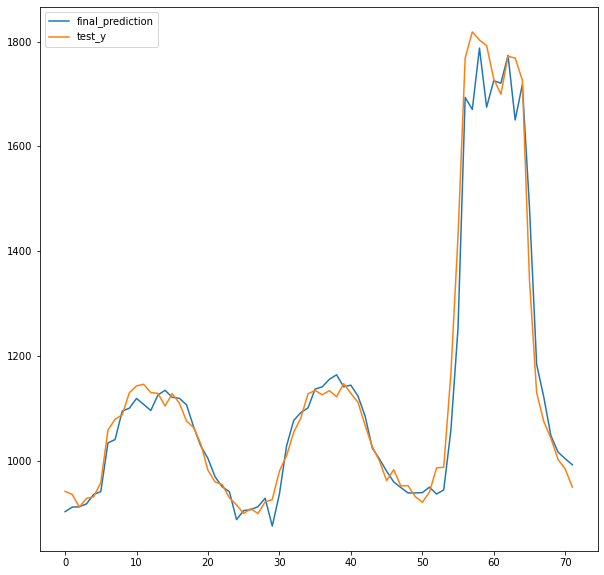

In [41]:
plt.figure(figsize=(10,10))
plt.plot(day, final_prediction)
plt.plot(day, test_y)
plt.legend(['final_prediction', 'test_y'])
plt.show